In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,id,title,text,subject,date,label
0,13355,"Exclusive: Pentagon, Lockheed near deal on $9 ...",WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,"January 19, 2017",0
1,2113,“HILL”ARIOUS…MUST SEE! IOWA PARADE GOERS Treat...,HILL larious! If this was a Donald Trump pi a...,left-news,"Aug 3, 2016",1
2,27667,Philippine leader says 'no way' he'll do deal ...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 9, 2017",0
3,15368,Biden asks U.S. Congress to allow unencumbered...,WASHINGTON (Reuters) - Vice President Joe Bide...,politicsNews,"September 8, 2016",0
4,6934,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,News,"February 6, 2017",1


In [4]:
df.value_counts()

,,,,,,count
id,title,text,subject,date,label,
28555,Vatican upbeat on possibility of Pope Francis visiting Russia,"MOSCOW (Reuters) - Vatican Secretary of State Cardinal Pietro Parolin said on Tuesday that there was positive momentum behind the idea of Pope Francis visiting Russia, but suggested there was more work to be done if it were to happen. Parolin, speaking at a joint news conference in Moscow alongside Russian Foreign Minister Sergei Lavrov, did not give any date for such a possible visit. The Eastern and Western branches of Christianity split apart in 1054. The pope, leader of the world s 1.2 billion Catholics, is seeking to improve ties, and last year in Cuba held what was the first ever meeting between a Roman Catholic pope and a Russian Orthodox patriarch. Parolin said he had also used his talks in the Russian capital to also raise certain difficulties faced by the Catholic Church in Russia. He said that Moscow and the Vatican disagreed about the plight of Christians in certain parts of the world. He did not elaborate. Parolin, who is due later on Tuesday to meet Patriarch Kirill, the head of the Russian Orthodox Church, said he also believed Russia could play an important role when it came to helping solve a crisis in Venezuela because of its close relations with Caracas.",worldnews,"August 22, 2017",0,1
1,ABOUT HILLARY’S COUGH: We Discovered The Secret To Why She Keeps Coughing [Video],,politics,"Jul 20, 2016",1,1
2,BREAKING: OBAMACARE REPEAL Clears First Hurdle…Dems Get Snarky,"The Senate voted 51-48 this afternoon to proceed to the resolution, S. Con. Res. 3, which would set up a filibuster-proof process, ensuring the chamber s consideration of legislation repealing parts of Obamacare and replacing it, either as one bill or as separate measures.The 54-page document, unveiled yesterday by Budget Chairman Mike Enzi, directs committees of jurisdiction to come up with Affordable Care Act legislation by Jan. 27, meaning a repeal bill could be to Donald Trump s desk by the end February, lawmakers said today.The House Ways and Means and Energy and Commerce as well as the Senate Finance and Health, Education, Labor, and Pensions committees are charged with drafting the legislation.Senate action came as Obama and Pence both headed to the Capitol to meet with their respective parties to discuss efforts to preserve or undo the health-care law. House Ways and Means Chairman Kevin Brady of Texas said that an Obamacare replacement proposal would be laid out on a step-by-step basis and could be fully written by the August recess.The Obama administration immediately hit back with the comment that the Senate vote was passed by a pretty narrow margin Josh Earnest went on to say that the Republicans will be responsible for the ensuing chaos LOL! Via: ZH",politics,"Jan 4, 2017",1,1
3,‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Saying She’d Back Abolition Of The Electoral College [Video],So much for the SCOTUS not being political Check out her comments on equality for women. It s like she s time traveled back to the 50 s. What is the deal with these women that think we re still in the dark ages!,left-news,"Feb 7, 2017",1,1
4,WATCH: Kellyanne Conway Very Upset Hillary Clinton Is Not Doing Trump’s Job,"White House counselor Kellyanne Conway crawled out of her crypt after two weeks in hiding to attack Hillary Clinton who is totally not the President. Former reality show star Donald Trump was sworn in 216 days ago (seems longer, huh?) and his administration is still talking about his former rival. It s not too surprising since Trump is still in campaign mode, holding rallies, likely because he still doesn t know how to President.On Thursday, Conway appeared on Fox & Friends to lash out at Trump s critics, the media, and Hillary Clinton for daring to write a book because books are bad, apparently. Where s her big c4 trying to help women and children around the globe? Conway asked as if the Clinton Foundation which helps women and child

In [5]:
df.shape

(22844, 6)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
label_counts = df['label'].value_counts()
real = label_counts.get(0, 0) # Get count for label 0, default to 0 if not present
fake = label_counts.get(1, 0) # Get count for label 1, default to 0 if not present

print(f"Real news: {real}")
print(f"Fake news: {fake}")

Real news: 17133
Fake news: 5711


/tmp/ipython-input-3654239494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=df,palette='Blues')


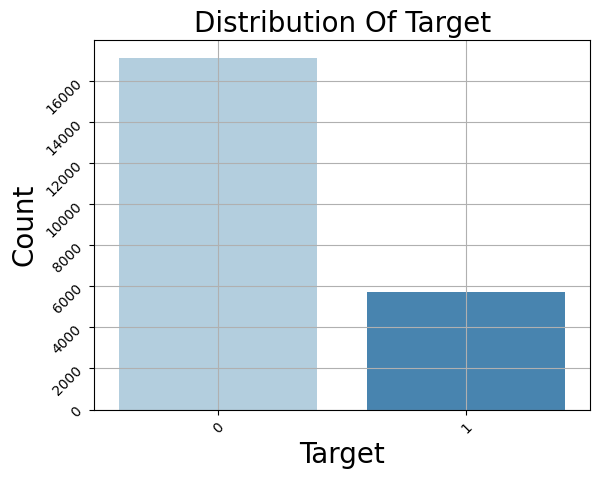

In [8]:
sns.countplot(x='label',data=df,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [9]:
df.subject.value_counts()

,count
subject,
politicsNews,9028
worldnews,8105
News,2206
politics,1644
left-news,1071
Government News,403
US_News,197
Middle-east,190


In [10]:
counts = df.groupby(['subject', 'label']).size().unstack(fill_value=0)
counts

label,0,1
subject,,
Government News,0,403
Middle-east,0,190
News,0,2206
US_News,0,197
left-news,0,1071
politics,0,1644
politicsNews,9028,0
worldnews,8105,0


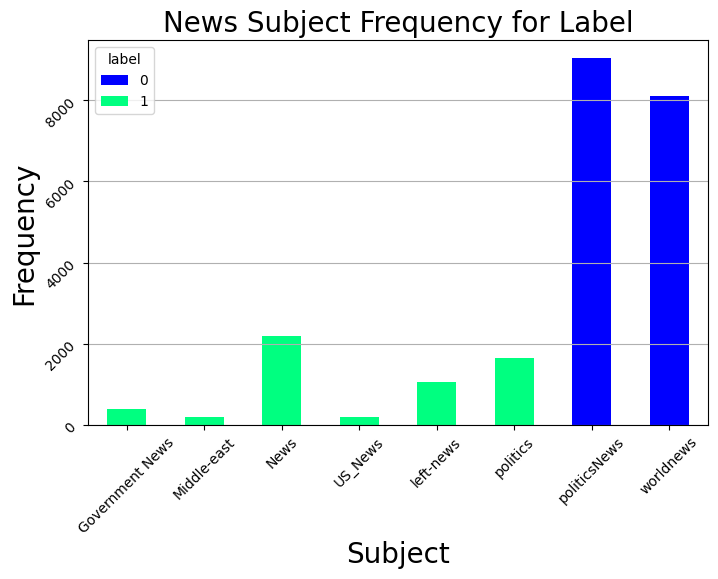

In [11]:
plt.figure(figsize=(8,5))
counts.plot(kind='bar', stacked=True, colormap="winter", ax=plt.gca())
plt.title('News Subject Frequency for Label', fontsize=20)
plt.xlabel('Subject', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Como o News Subject está se tornando altamente tendencioso no que se refere à label, é um forte indicador para nao utilizar no treinamento do modelo

Com isso, posso perceber que o modelo será treinado usando apenas a featru 'text'